In [28]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import matplotlib.ticker as mtick
import numpy as np
from time import time
import math
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import glob
from sklearn.preprocessing import MinMaxScaler
from NNDAD import NNDAD 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from distribution import TestDistribution
from sklearn.metrics import f1_score
import mat73
from scipy.io import loadmat

## Illustration

In [29]:
distribution = TestDistribution(index = 5, dim = 2).returnDistribution()

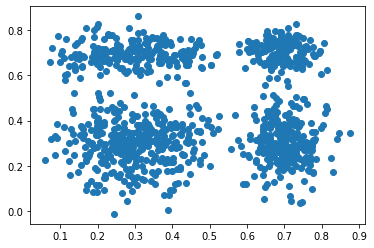

In [30]:
X, density = distribution.generate(1000)
plt.scatter(X[:,0], X[:,1])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(0.0, 1.0)

(0.0, 1.0)

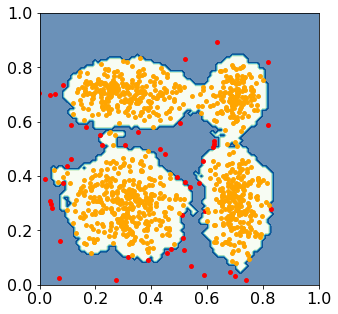

In [57]:
n = 1000
n_test = 500
quantile = 0.95
k = 5

fig, ax = plt.subplots(figsize=(5,5))

# training data
np.random.seed(1)
X, density = distribution.generate(n)
X_test, density_test = distribution.generate(n_test)
# kd tree and get threshold
tree_KNN = KDTree(X)
distance_vec, _ = tree_KNN.query(X, k + 1)
distance_vec_train = distance_vec[:,-1]
threshold = np.quantile(distance_vec_train, quantile)


# get grid and plot boundary
axis0,axis1 = np.meshgrid(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
distance_vec, _ = tree_KNN.query(X_grid, k + 1)
distance_vec = distance_vec[:,-1]
y_pred_knn = (distance_vec > threshold).astype(int).reshape(-1,axis1.shape[0])
plt.contourf(axis0, axis1, y_pred_knn , 20, cmap = "GnBu", alpha = .6)
outlier_idx = distance_vec_train > threshold
plt.scatter(X[outlier_idx, 0], X[outlier_idx, 1], c = "red", s = 15)
plt.scatter(X[~outlier_idx, 0], X[~outlier_idx, 1], c = "orange", s = 15)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0,1)
plt.ylim(0,1)

plt.savefig("./results/plot/k_distance_1.pdf",bbox_inches="tight")

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(0.0, 1.0)

(0.0, 1.0)

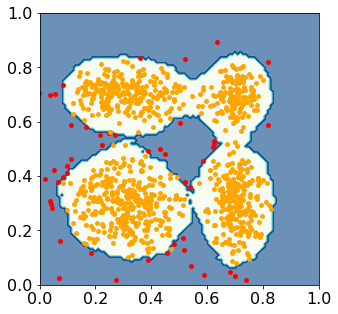

In [58]:
n = 1000
n_test = 500
quantile = 0.95
k = 20

fig, ax = plt.subplots(figsize=(5,5))

# training data
np.random.seed(1)
X, density = distribution.generate(n)
X_test, density_test = distribution.generate(n_test)
# kd tree and get threshold
tree_KNN = KDTree(X)
distance_vec, _ = tree_KNN.query(X, k + 1)
distance_vec_train = distance_vec[:,-1]
threshold = np.quantile(distance_vec_train, quantile)


# get grid and plot boundary
axis0,axis1 = np.meshgrid(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
distance_vec, _ = tree_KNN.query(X_grid, k + 1)
distance_vec = distance_vec[:,-1]
y_pred_knn = (distance_vec > threshold).astype(int).reshape(-1,axis1.shape[0])
plt.contourf(axis0, axis1, y_pred_knn , 20, cmap = "GnBu", alpha = .6)
outlier_idx = distance_vec_train > threshold
plt.scatter(X[outlier_idx, 0], X[outlier_idx, 1], c = "red", s = 15)
plt.scatter(X[~outlier_idx, 0], X[~outlier_idx, 1], c = "orange", s = 15)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(0,1)
plt.ylim(0,1)

plt.savefig("./results/plot/k_distance_2.pdf",bbox_inches="tight")

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(0.0, 1.0)

(0.0, 1.0)

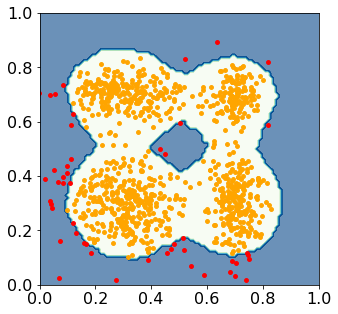

In [60]:
n = 1000
n_test = 500
quantile = 0.95
k = 100

fig, ax = plt.subplots(figsize=(5,5))

# training data
np.random.seed(1)
X, density = distribution.generate(n)
X_test, density_test = distribution.generate(n_test)
# kd tree and get threshold
tree_KNN = KDTree(X)
distance_vec, _ = tree_KNN.query(X, k + 1)
distance_vec_train = distance_vec[:,-1]
threshold = np.quantile(distance_vec_train, quantile)


# get grid and plot boundary
axis0,axis1 = np.meshgrid(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
distance_vec, _ = tree_KNN.query(X_grid, k + 1)
distance_vec = distance_vec[:,-1]
y_pred_knn = (distance_vec > threshold).astype(int).reshape(-1,axis1.shape[0])
plt.contourf(axis0, axis1, y_pred_knn , 20, cmap = "GnBu", alpha = .6)
outlier_idx = distance_vec_train > threshold
plt.scatter(X[outlier_idx, 0], X[outlier_idx, 1], c = "red", s = 15)
plt.scatter(X[~outlier_idx, 0], X[~outlier_idx, 1], c = "orange", s = 15)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.xlim(0,1)
plt.ylim(0,1)

plt.savefig("./results/plot/k_distance_3.pdf",bbox_inches="tight")

# k-distance - level set

In [67]:
distribution = TestDistribution(index = 2, dim = 1).returnDistribution()

(0.0, 0.15)

Text(0.5, 0, 'x')

Text(0, 0.5, 'W distance')

Text(0, 0.5, 'True density')

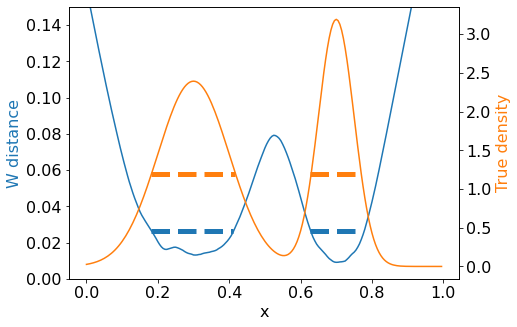

In [73]:
n = 2000
quantile = 0.07
lamda = 2
k = 250
d = 1

np.random.seed(202)
X, density = distribution.generate(n)

# kd tree and get threshold
tree_KNN = KDTree(X)




# get grid and plot boundary
X_grid = np.arange(0,1,0.005).reshape(-1,1)
distance_vec = tree_KNN.query(X_grid, k + 1)[0].mean(axis = 1)
density_vec = distribution.density(X_grid)


# # Sample data
x = X_grid
y1 = distance_vec
y2 = density_vec

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(7,5))

# Plot the first dataset on the first axis
ax1.plot(x, y1, color='#1f77b4')
ax1.set_ylim(0,0.15)
ax1.set_xlabel('x', fontsize = 16)
ax1.set_ylabel('W distance', color='#1f77b4', fontsize = 16)

# Create a second axis that shares the same x-axis as the first axis
ax2 = ax1.twinx()

# Plot the second dataset on the second axis
ax2.plot(x, y2, color='#ff7f0e')
ax2.set_ylabel('True density', color='#ff7f0e', fontsize = 16)

ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)

# Set title and show the plot
# plt.title('Double Y-axis Line Plot')

threshold_density = 1.2
density_levelset_idx = density_vec > threshold_density
# ax2.scatter(x[density_levelset_idx], np.repeat(threshold_density,density_levelset_idx.sum()), c = "r")
hline_position = np.where(np.diff(density_levelset_idx.astype(int)))[0] / X_grid.shape[0]
ax2.hlines(threshold_density, hline_position[0], hline_position[1], linestyles = "dashed", colors = "#ff7f0e", linewidths = 5)
ax2.hlines(threshold_density, hline_position[2], hline_position[3], linestyles = "dashed", colors = "#ff7f0e", linewidths = 5)

threshold_distance = np.array([ (i / n)**(1 / d)  for i in range(1, k + 1)]).mean() / (2 * threshold_density)**(1/d)
distance_levelset_idx = distance_vec < threshold_distance
# ax1.scatter(x[distance_levelset_idx], np.repeat(threshold_distance,distance_levelset_idx.sum()), c = "b")
hline_position = np.where(np.diff(distance_levelset_idx.astype(int)))[0] / X_grid.shape[0]
ax1.hlines(threshold_distance, hline_position[0], hline_position[1], linestyles = "dashed", colors = "#1f77b4", linewidths = 5)
ax1.hlines(threshold_distance, hline_position[2], hline_position[3], linestyles = "dashed", colors = "#1f77b4", linewidths = 5)



plt.savefig("./results/plot/wdist_density.pdf",bbox_inches="tight")

(-0.1, 4.5)

Text(0.5, 0, 'x')

Text(0, 0.5, 'density')

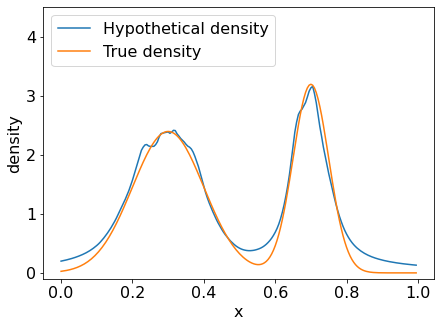

In [74]:
n = 2000
quantile = 0.05
lamda = 2
k = 250
d = 1
np.random.seed(200)
X, density = distribution.generate(n)

# kd tree and get threshold
tree_KNN = KDTree(X)


# get grid and plot boundary
X_grid = np.arange(0,1,0.005).reshape(-1,1)
distance_vec = tree_KNN.query(X_grid, k + 1)[0].mean(axis = 1)
density_vec = distribution.density(X_grid)


# # Sample data
x = X_grid
y1 =    np.array([ (i / n)**(1 / d) / k for i in range(1, k + 1)]).sum()**d / 2 / distance_vec**d 
y2 = density_vec

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(7,5))

# Plot the first dataset on the first axis
ax.plot(x, y1, color='#1f77b4', label = "Hypothetical density")
ax.plot(x, y2, color='#ff7f0e', label = "True density")
plt.legend( fontsize = 16, loc = 2)
plt.ylim(-0.1,4.5)

ax.tick_params(labelsize=16)

# ax1.set_ylim(0,0.15)
ax.set_xlabel('x', fontsize = 16)
ax.set_ylabel('density', fontsize = 16)

# Create a second axis that shares the same x-axis as the first axis

# Plot the second dataset on the second axis

# Set title and show the plot
# plt.title('DoubleY-axis Line Plot')

# threshold_density = 1.2
# density_levelset_idx = density_vec > threshold_density
# ax2.scatter(x[density_levelset_idx], np.repeat(threshold_density,density_levelset_idx.sum()), c = "r")



# threshold_distance = np.array([ (i / n)**(1 / d) for i in range(1, k + 1)]).mean() / (2 * threshold_density)**(1/d)
# distance_levelset_idx = distance_vec < threshold_distance
# ax1.scatter(x[distance_levelset_idx], np.repeat(threshold_distance,distance_levelset_idx.sum()), c = "b")

plt.savefig("./results/plot/wdistdensity_density.pdf",bbox_inches="tight")

## Pointwise error and ERUB (negated)

Text(0.5, 0, 'x')

Text(0, 0.5, 'Pointwise error')

Text(0, 0.5, 'ERUB')

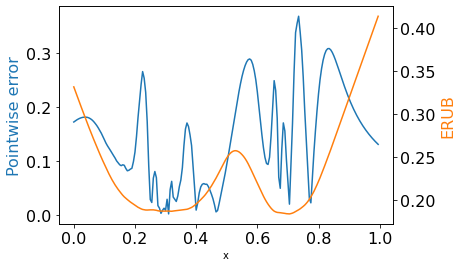

In [111]:
n = 2000

k = 250
d = 1
np.random.seed(200)
X, density = distribution.generate(n)

# kd tree and get threshold
tree_KNN = KDTree(X)


# get grid and plot boundary
X_grid = np.arange(0,1,0.005).reshape(-1,1)
distance_vec = tree_KNN.query(X_grid, k + 1)[0].mean(axis = 1)
density_vec = distribution.density(X_grid)


# # Sample data
x = X_grid
y1 = np.abs(np.array([ (i / n)**(1 / d) / k for i in range(1, k + 1)]).sum()**d / 2 / distance_vec**d  - density_vec)
y2 = distance_vec + np.sqrt(np.log(n) / k)

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot the first dataset on the first axis
ax1.plot(x, y1, color='#1f77b4')
# ax1.set_ylim(0,0.15)
ax1.set_xlabel('x')
ax1.set_ylabel('Pointwise error', color='#1f77b4', fontsize = 16)

# Create a second axis that shares the same x-axis as the first axis
ax2 = ax1.twinx()

# Plot the second dataset on the second axis
ax2.plot(x, y2, color='#ff7f0e')
ax2.set_ylabel('ERUB', color='#ff7f0e', fontsize = 16)

# Set title and show the plot
# plt.title('DoubleY-axis Line Plot')

# threshold_density = 1.2
# density_levelset_idx = density_vec > threshold_density
# ax2.scatter(x[density_levelset_idx], np.repeat(threshold_density,density_levelset_idx.sum()), c = "r")

ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)

# threshold_distance = np.array([ (i / n)**(1 / d) for i in range(1, k + 1)]).mean() / (2 * threshold_density)**(1/d)
# distance_levelset_idx = distance_vec < threshold_distance
# ax1.scatter(x[distance_levelset_idx], np.repeat(threshold_distance,distance_levelset_idx.sum()), c = "b")



Text(0.5, 0, 'x')

Text(0, 0.5, 'error')

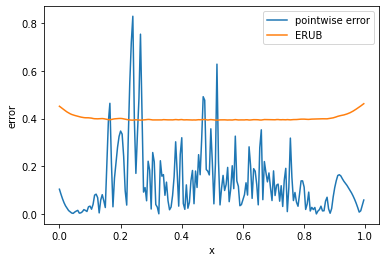

In [114]:
n = 2000

k = 50
d = 1
np.random.seed(200)
X, density = distribution.generate(n)

# kd tree and get threshold
tree_KNN = KDTree(X)


# get grid and plot boundary
X_grid = np.arange(0,1,0.005).reshape(-1,1)
distance_vec = tree_KNN.query(X_grid, k + 1)[0].mean(axis = 1)
density_vec = distribution.density(X_grid)


# # Sample data
x = X_grid
y1 = np.abs(np.array([ (i / n)**(1 / d) / k for i in range(1, k + 1)]).sum()**d / 2 / distance_vec**d  - density_vec)
y2 = distance_vec + np.sqrt(np.log(n) / k)

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the first dataset on the first axis
ax.plot(x, y1, color='#1f77b4', label = "pointwise error")
# ax1.set_ylim(0,0.15)
ax.set_xlabel('x')
ax.set_ylabel('error')


ax.plot(x, y2, color='#ff7f0e', label = "ERUB")

plt.legend()
# Set title and show the plot
# plt.title('DoubleY-axis Line Plot')

# threshold_density = 1.2
# density_levelset_idx = density_vec > threshold_density
# ax2.scatter(x[density_levelset_idx], np.repeat(threshold_density,density_levelset_idx.sum()), c = "r")



# threshold_distance = np.array([ (i / n)**(1 / d) for i in range(1, k + 1)]).mean() / (2 * threshold_density)**(1/d)
# distance_levelset_idx = distance_vec < threshold_distance
# ax1.scatter(x[distance_levelset_idx], np.repeat(threshold_distance,distance_levelset_idx.sum()), c = "b")



3

Text(0.5, 0, 'x')

Text(0, 0.5, 'error')

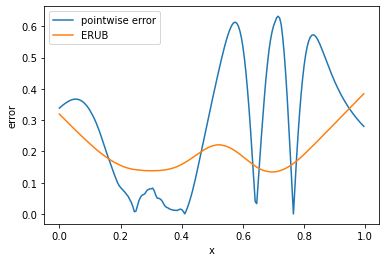

In [51]:
distribution = TestDistribution(index = 2, dim = 1).returnDistribution()
n = 2000

k = 100
d = 1
np.random.seed(200)
X, density = distribution.generate(n)

# kd tree and get threshold
model_NNDAD = NNDAD( lamda_list = [3]).fit(X)
    
    
model_NNDAD.lamda


# get grid and plot boundary
X_grid = np.arange(0,1,0.005).reshape(-1,1)
# distance_vec = tree_KNN.query(X_grid, k + 1)[0].mean(axis = 1)
density_vec = distribution.density(X_grid)


# # Sample data
x = X_grid
y1 = np.abs(model_NNDAD.density(X_grid)   - density_vec)
y2 = model_NNDAD.ERUB(X_grid)

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the first dataset on the first axis
ax.plot(x, y1, color='#1f77b4', label = "pointwise error")
# ax1.set_ylim(0,0.15)
ax.set_xlabel('x')
ax.set_ylabel('error')


ax.plot(x, y2, color='#ff7f0e', label = "ERUB")

plt.legend()
# Set title and show the plot
# plt.title('DoubleY-axis Line Plot')

# threshold_density = 1.2
# density_levelset_idx = density_vec > threshold_density
# ax2.scatter(x[density_levelset_idx], np.repeat(threshold_density,density_levelset_idx.sum()), c = "r")



# threshold_distance = np.array([ (i / n)**(1 / d) for i in range(1, k + 1)]).mean() / (2 * threshold_density)**(1/d)
# distance_levelset_idx = distance_vec < threshold_distance
# ax1.scatter(x[distance_levelset_idx], np.repeat(threshold_distance,distance_levelset_idx.sum()), c = "b")



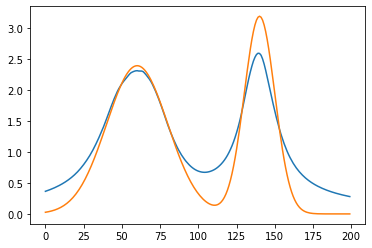

In [52]:
plt.plot(model_NNDAD.density(X_grid) )
plt.plot(density_vec)


0.5

Text(0.5, 0, 'x')

Text(0, 0.5, 'error')

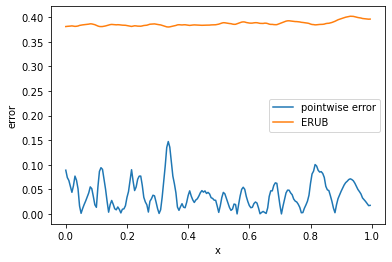

In [28]:
distribution = TestDistribution(index = 1, dim = 1).returnDistribution()
n = 2000

k = 100
d = 1
np.random.seed(200)
X, density = distribution.generate(n)

# kd tree and get threshold
model_NNDAD = NNDAD( lamda_list = [0.5]).fit(X)
    
    
model_NNDAD.lamda


# get grid and plot boundary
X_grid = np.arange(0,1,0.005).reshape(-1,1)
# distance_vec = tree_KNN.query(X_grid, k + 1)[0].mean(axis = 1)
density_vec = distribution.density(X_grid)


# # Sample data
x = X_grid
y1 = np.abs(model_NNDAD.density(X_grid)   - density_vec)
y2 = model_NNDAD.ERUB(X_grid)

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the first dataset on the first axis
ax.plot(x, y1, color='#1f77b4', label = "pointwise error")
# ax1.set_ylim(0,0.15)
ax.set_xlabel('x')
ax.set_ylabel('error')


ax.plot(x, y2, color='#ff7f0e', label = "ERUB")

plt.legend()
# Set title and show the plot
# plt.title('DoubleY-axis Line Plot')

# threshold_density = 1.2
# density_levelset_idx = density_vec > threshold_density
# ax2.scatter(x[density_levelset_idx], np.repeat(threshold_density,density_levelset_idx.sum()), c = "r")



# threshold_distance = np.array([ (i / n)**(1 / d) for i in range(1, k + 1)]).mean() / (2 * threshold_density)**(1/d)
# distance_levelset_idx = distance_vec < threshold_distance
# ax1.scatter(x[distance_levelset_idx], np.repeat(threshold_distance,distance_levelset_idx.sum()), c = "b")



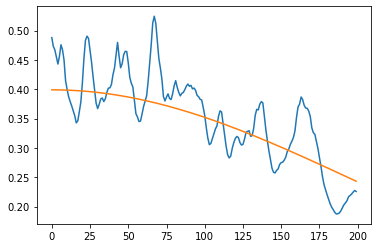

In [29]:
plt.plot(model_NNDAD.density(X_grid) )
plt.plot(density_vec)


## MAE - ERUB

In [21]:
from distribution import TestDistribution
np.random.seed(1)  
distribution = TestDistribution(index = 4, dim = 1).returnDistribution()

n = 1000
X = distribution.sampling(n)
X_test = distribution.sampling(  n)


score_vec = []
mae_vec = []
lamda_vec = [i for i in np.logspace(-1, 2, 20)]
for lamda in lamda_vec:
    model_NNDAD = NNDAD( lamda_list = [lamda]).fit(X)
    
    
    score_vec.append(model_NNDAD.best_score)
    mae_vec.append(np.abs(model_NNDAD.density(X_test) -  distribution.density(X_test)).mean())

score_vec = np.array(score_vec)
mae_vec = np.array(mae_vec)




Text(0.5, 0, 'log($\\lambda$)')

Text(0, 0.5, 'ERUB')

Text(0, 0.5, 'MAE')

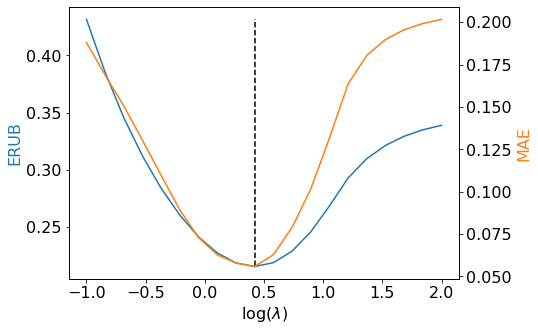

In [22]:

# Sample data
x = lamda_vec
y1 = score_vec
y2 = mae_vec

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(7,5))

# Plot the first dataset on the first axis
ax1.plot(np.log10(x), y1, color='#1f77b4')
ax1.set_xlabel(r'log($\lambda$)', fontsize = 16)
ax1.set_ylabel('ERUB', color='#1f77b4', fontsize = 16)

# ax1.set_ylim(0.205,0.45)

# Create a second axis that shares the same x-axis as the first axis
ax2 = ax1.twinx()

ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)

# Plot the second dataset on the second axis
ax2.plot(np.log10(x), y2, color='#ff7f0e')
ax2.set_ylabel('MAE', color='#ff7f0e', fontsize = 16)

ax1.vlines(np.log10(2.636650898730358), y1.min(),y1.max(), color = "black", linestyle = "dashed")

# Set title and show the plot

plt.savefig("./results/plot/MAE_ERUB.pdf",bbox_inches="tight")


## A First Realdata Experiment

In [40]:
import numpy as np
import os
import glob
from time import time
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KDTree
from scipy.stats import rankdata
from NNDAD import NNDAD


data_file_dir = "./dataset/anomaly/"
method_seq = glob.glob("{}/*.csv".format(data_file_dir))
data_file_name_seq = [os.path.split(method)[1] for method in method_seq]
log_file_dir = "./results/anomaly_realdata/"

  
for data_file_name in data_file_name_seq:
    print(data_file_name)
    data_file_path = os.path.join(data_file_dir, data_file_name)
    data = pd.read_csv(data_file_path)
    data = np.array(data)
    X_train=data[:,:-1]
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    y_train=data[:,-1]
    y_train=1-2*y_train
    log_file_name = "realdata.csv"
    log_file_path = os.path.join(log_file_dir, log_file_name)
    
    # nearest neighbor distance self-tuning
    model_NNDAD = NNDAD( lamda_list = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10], ).fit(X_train)
    scaler = MinMaxScaler()
    y_pred = scaler.fit_transform( - model_NNDAD.predict(X_train).reshape(-1,1))
    roc_auc = roc_auc_score(y_train, y_pred)
    
    with open(log_file_path, "a") as f:
        logs= "{},{},{}\n".format(data_file_name.split(".")[0],"NNDAD", roc_auc)
        f.writelines(logs)
       
    
    
    # weighted nearest neighbor distance
    roc_auc = 0
    for lamda in [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10]:
        model_WNN = NNDAD( lamda_list = [lamda]).fit(X_train)
        scaler = MinMaxScaler()
        y_pred = scaler.fit_transform( - model_WNN.predict(X_train).reshape(-1,1))
        roc_auc = max(roc_auc, roc_auc_score(y_train,y_pred))
    with open(log_file_path, "a") as f:
        logs= "{},{},{}\n".format(data_file_name.split(".")[0],"WNN", roc_auc)
        f.writelines(logs)

    # IForest
    roc_auc=0
    for n_estimators in [100,300,500]:
        model_IF=IsolationForest(random_state=1,n_estimators=n_estimators).fit(X_train,y_train)
        scaler=MinMaxScaler()
        y_pred=scaler.fit_transform(model_IF.decision_function(X_train).reshape(-1,1))
        roc_auc=max(roc_auc,roc_auc_score(y_train,y_pred))
    with open(log_file_path, "a") as f:
        logs= "{},{},{}\n".format(data_file_name.split(".")[0],"IF", roc_auc)
        f.writelines(logs)

    # LOF
    roc_auc=0
    for n_neighbors in [5*i for i in range(1,11)]:
        model_LOF=LocalOutlierFactor(n_neighbors=n_neighbors).fit(X_train,y_train)
        scaler=MinMaxScaler()
        y_pred=scaler.fit_transform(model_LOF.negative_outlier_factor_.reshape(-1,1))
        roc_auc=max(roc_auc,roc_auc_score(y_train,y_pred))
    with open(log_file_path, "a") as f:
        logs= "{},{},{}\n".format(data_file_name.split(".")[0],"LOF", roc_auc)
        f.writelines(logs)
        
    # OCSVM
    roc_auc=0
    for gamma in [1e-3,1e-2,1e-1,1,1e1]:
        model_OCSVM=OneClassSVM(gamma=gamma).fit(X_train,y_train)
        scaler=MinMaxScaler()
        y_pred=scaler.fit_transform(model_OCSVM.decision_function(X_train).reshape(-1,1))
        roc_auc=max(roc_auc,roc_auc_score(y_train,y_pred))
    with open(log_file_path, "a") as f:
        logs= "{},{},{}\n".format(data_file_name.split(".")[0],"OCSVM", roc_auc)
        f.writelines(logs)
        
    # KNN
    roc_auc=0
    tree_KNN=KDTree(X_train)
    for n_neighbors in [5*i for i in range(1,11)]:
        distance_vec,_=tree_KNN.query(X_train,n_neighbors+1)
        distance_vec=distance_vec[:,-1]
        scaler=MinMaxScaler()
        y_pred=scaler.fit_transform(-distance_vec.reshape(-1,1))
        roc_auc=max(roc_auc,roc_auc_score(y_train,y_pred))
    with open(log_file_path, "a") as f:
        logs= "{},{},{}\n".format(data_file_name.split(".")[0],"KNN", roc_auc)
        f.writelines(logs)


    
   
    
  
    
  




pima.csv
shuttle.csv
satellite.csv
pendigits.csv
satimage-2.csv
optdigits.csv
mnist.csv
thyroid.csv
vowels.csv
musk.csv
wine.csv
cardio.csv
wbc.csv
breastw.csv
vertebral.csv
glass.csv
annthyroid.csv
ionosphere.csv
letter.csv


In [70]:


log_file_dir = "./results/anomaly_realdata/realdata.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "dataset,method,score".split(',')

    
summary = pd.pivot_table(log, index=["dataset"],columns=["method"], values=[ "score"], aggfunc=[np.mean])





In [71]:
######### WNN uses the best parameter while NNDAD uses parameter selected by ERUB
summary

mean                                                    \
                score                                                     
method            DTM        IF       KNN       LOF     NNDAD     OCSVM   
dataset                                                                   
annthyroid   0.736251  0.823224  0.734278  0.718014  0.654228  0.634242   
arrhythmia   0.804954  0.815120  0.805699  0.788860  0.801068  0.789017   
breastw      0.995533  0.986777  0.988166  0.475826  0.986872  0.978371   
cardio       0.955507  0.925618  0.920212  0.746716  0.898535  0.932227   
cover        0.931545  0.891527  0.906989  0.655426  0.929709  0.950936   
glass        0.844444  0.718410  0.849673  0.794662  0.764706  0.814815   
http         0.171332  0.999900  0.130787  0.363460  0.993891  0.994855   
ionosphere   0.931041  0.862351  0.931424  0.901573  0.934984  0.906498   
letter       0.899947  0.638833  0.894957  0.903656  0.861601  0.595370   
lympho       0.994131  1.000000  0.995305  0.994131  0.992958  0.992958   
mammography  0.844761  0.861647  0.846112  0.821302  0.861314  0.844317   
mnist        0.862966  0.811165  0.859762  0.742027  0.850087  0.822650   
musk         1.000000  1.000000  0.997084  0.527902  0.247962  1.000000   
optdigits    0.780892  0.741010  0.418887  0.665811  0.442398  0.567392   
pendigits    0.963868  0.958202  0.860556  0.543700  0.863735  0.960685   
pima         0.729776  0.672689  0.729236  0.647251  0.729453  0.647963   
satellite    0.793583  0.704398  0.708102  0.565465  0.679313  0.678989   
satimage-2   0.999069  0.994392  0.998604  0.594985  0.999049  0.996616   
shuttle      0.963466  0.997637  0.709348  0.536939  0.990455  0.987425   
smtp         0.898319  0.910093  0.934360  0.935803  0.910322  0.774622   
speech       0.514451       NaN       NaN       NaN       NaN       NaN   
thyroid      0.950606  0.981158  0.950977  0.946374  0.936416  0.927535   
vertebral    0.367460  0.357895  0.376077  0.473046  0.322648  0.410526   
vowels       0.983201  0.785181  0.979701  0.948484  0.954534  0.953594   
wbc          0.947979  0.937266  0.949037  0.949171  0.947699  0.946629   
wine         0.898319  0.836601  0.929038  0.935574  0.886088  0.718021   

                                           
                                           
method            WNN   WNNDIST pidforest  
dataset                                    
annthyroid   0.755289  0.613668  0.898470  
arrhythmia   0.803619  0.803619  0.829526  
breastw      0.995145  0.994054  0.978604  
cardio       0.951808  0.968525  0.892552  
cover        0.929773  0.966156  0.944232  
glass        0.840414  0.846612  0.731707  
http         0.993891  0.994786  0.994668  
ionosphere   0.934984  0.929771  0.861182  
letter       0.925183  0.914620  0.748673  
lympho       0.994131  0.992958  1.000000  
mammography  0.861416  0.863034  0.865030  
mnist        0.861017  0.819868  0.701855  
musk         0.999817  1.000000  1.000000  
optdigits    0.632762  0.489521  0.906925  
pendigits    0.958207  0.958661  0.955976  
pima         0.729453  0.722858  0.688149  
satellite    0.784215  0.779351  0.743499  
satimage-2   0.999049  0.997833  0.993862  
shuttle      0.990455  0.987951  0.992359  
smtp         0.851147  0.778585  0.884034  
speech            NaN       NaN  0.513730  
thyroid      0.951055  0.921437  0.977935  
vertebral    0.500000  0.534603  0.309444  
vowels       0.983146  0.972148  0.796735  
wbc          0.947699  0.964386  0.964252  
wine         0.886088  0.785714  0.909244

In [16]:


log_file_dir = "./results/anomaly_realdata/realdata.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "dataset,method,score".split(',')

    
summary = pd.pivot_table(log, index=["dataset"],columns=["method"], values=[ "score"], aggfunc=[np.max])

summary

amax                                                    \
                score                                                     
method            DTM        IF       KNN       LOF     NNDAD     OCSVM   
dataset                                                                   
annthyroid   0.736251  0.823224  0.734278  0.718014  0.654250  0.634242   
arrhythmia   0.804954  0.815120  0.805699  0.788860  0.785288  0.789017   
breastw      0.995533  0.986777  0.988166  0.475826  0.986911  0.978371   
cardio       0.955507  0.925618  0.920212  0.746716  0.898730  0.932227   
cover        0.931545  0.891527  0.932730  0.935174  0.929709  0.950936   
glass        0.844444  0.718410  0.849673  0.794662  0.745257  0.814815   
heart        0.217153  0.266981  0.761664  0.332075       NaN  0.457804   
http         0.171332  0.999900  0.130787  0.363460  0.993891  0.994855   
ionosphere   0.931041  0.862351  0.931424  0.901573  0.935062  0.906498   
letter       0.899947  0.638833  0.894957  0.903656  0.861620  0.595370   
lympho       0.994131  1.000000  0.995305  0.994131  0.982394  0.992958   
mammography  0.844761  0.861647  0.846112  0.821302  0.812696  0.844317   
mnist        0.862966  0.811165  0.859762  0.742027  0.850111  0.822650   
mulcross     0.001108  0.964102  0.000189  0.602073       NaN  0.999971   
musk         1.000000  1.000000  0.997084  0.527902  0.251098  1.000000   
optdigits    0.780892  0.741010  0.418887  0.665811  0.442552  0.567392   
pendigits    0.963868  0.958202  0.860556  0.543700  0.863862  0.960685   
pima         0.729776  0.672689  0.729236  0.647251  0.729381  0.647963   
satellite    0.793583  0.710526  0.708155  0.565527  0.736653  0.679023   
satimage-2   0.999069  0.994392  0.998604  0.594985  0.999049  0.996616   
shuttle      0.963466  0.997637  0.709348  0.536939  0.990410  0.987425   
smtp         0.898319  0.910093  0.934360  0.935803  0.846867  0.774622   
speech       0.514451  0.471747  0.478150  0.483188       NaN  0.556624   
thyroid      0.950606  0.981158  0.950977  0.946374  0.936463  0.927535   
vertebral    0.367460  0.357895  0.376077  0.473046  0.323016  0.410526   
vowels       0.983201  0.785181  0.979701  0.948484  0.954609  0.953594   
wbc          0.947979  0.937266  0.949037  0.949171  0.947846  0.946629   
wine         0.898319  0.836601  0.929038  0.935574  0.871429  0.718021   

                                 
                                 
method            WNN pidforest  
dataset                          
annthyroid   0.755330  0.898470  
arrhythmia   0.803855  0.829526  
breastw      0.995147  0.978604  
cardio       0.951895  0.892552  
cover        0.929773  0.944232  
glass        0.840414  0.731707  
heart             NaN  0.231475  
http         0.993891  0.994668  
ionosphere   0.935062  0.861182  
letter       0.925183  0.748673  
lympho       0.994131  1.000000  
mammography  0.861416  0.865030  
mnist        0.861040  0.701855  
mulcross          NaN  0.799450  
musk         0.999817  1.000000  
optdigits    0.632956  0.906925  
pendigits    0.958315  0.955976  
pima         0.729453  0.688149  
satellite    0.785070  0.743499  
satimage-2   0.999049  0.993862  
shuttle      0.990455  0.992359  
smtp         0.851147  0.884034  
speech            NaN  0.513730  
thyroid      0.951065  0.977935  
vertebral    0.500000  0.309444  
vowels       0.983172  0.796735  
wbc          0.947846  0.964252  
wine         0.886088  0.909244

In [27]:


log_file_dir = "./results/anomaly_realdata/tableresults.csv"

log = np.array(pd.read_csv(log_file_dir, header=None))


log

array([[7.367e-01, 7.363e-01, 7.180e-01, 7.343e-01, 8.985e-01, 8.232e-01,
        6.342e-01],
       [8.085e-01, 8.050e-01, 7.889e-01, 8.057e-01, 8.295e-01, 8.151e-01,
        7.890e-01],
       [9.957e-01, 9.955e-01, 4.758e-01, 9.882e-01, 9.786e-01, 9.868e-01,
        9.784e-01],
       [9.548e-01, 9.555e-01, 7.467e-01, 9.202e-01, 8.926e-01, 9.256e-01,
        9.322e-01],
       [9.250e-01, 9.315e-01, 9.352e-01, 9.327e-01, 9.442e-01, 8.915e-01,
        9.509e-01],
       [8.455e-01, 8.444e-01, 7.947e-01, 8.497e-01, 7.317e-01, 7.184e-01,
        8.148e-01],
       [5.193e-01, 2.172e-01, 3.321e-01, 7.617e-01, 2.315e-01, 2.670e-01,
        4.578e-01],
       [9.949e-01, 1.713e-01, 3.635e-01, 1.308e-01, 9.947e-01, 9.999e-01,
        9.949e-01],
       [9.415e-01, 9.310e-01, 9.016e-01, 9.314e-01, 8.612e-01, 8.624e-01,
        9.065e-01],
       [9.252e-01, 8.999e-01, 9.037e-01, 8.950e-01, 7.487e-01, 6.388e-01,
        5.954e-01],
       [9.965e-01, 9.941e-01, 9.941e-01, 9.953e-01, 1.000e+0

In [38]:
from scipy.stats import rankdata
np.array([rankdata(-result_vec, method = "min") for result_vec in log])

array([[3, 4, 6, 5, 1, 2, 7],
       [3, 5, 7, 4, 1, 2, 6],
       [1, 2, 7, 3, 5, 4, 6],
       [2, 1, 7, 5, 6, 4, 3],
       [6, 5, 3, 4, 2, 7, 1],
       [2, 3, 5, 1, 6, 7, 4],
       [2, 7, 4, 1, 6, 5, 3],
       [2, 6, 5, 7, 4, 1, 2],
       [1, 3, 5, 2, 7, 6, 4],
       [1, 3, 2, 4, 5, 6, 7],
       [3, 5, 5, 4, 1, 1, 7],
       [2, 5, 7, 4, 1, 3, 6],
       [1, 2, 6, 3, 7, 5, 4],
       [1, 6, 5, 7, 4, 3, 2],
       [1, 1, 7, 6, 1, 1, 1],
       [1, 3, 5, 7, 2, 4, 6],
       [1, 2, 7, 6, 5, 4, 3],
       [1, 2, 7, 3, 4, 5, 6],
       [1, 2, 7, 4, 3, 5, 6],
       [2, 1, 7, 3, 6, 5, 4],
       [3, 5, 7, 6, 2, 1, 4],
       [3, 5, 1, 2, 6, 4, 7],
       [2, 3, 5, 6, 4, 7, 1],
       [5, 4, 6, 3, 2, 1, 7],
       [1, 5, 2, 4, 7, 6, 3],
       [1, 1, 5, 3, 6, 7, 4],
       [2, 5, 3, 4, 1, 7, 6],
       [5, 4, 1, 2, 3, 6, 7]])

In [39]:
np.array([rankdata(-result_vec, method = "min") for result_vec in log]).sum(axis = 0)

array([ 59, 100, 144, 113, 108, 119, 127])

In [40]:


log_file_dir = "./results/anomaly_realdata/tableresults-2.csv"

log = np.array(pd.read_csv(log_file_dir, header=None))


np.array([rankdata(-result_vec, method = "min") for result_vec in log]).sum(axis = 0)

array([113,  61, 113, 162, 129, 125, 136, 145])

In [48]:


log_file_dir = "./results/anomaly_realdata/tableresults-3.csv"

log = np.array(pd.read_csv(log_file_dir, header=None))


np.array([rankdata(-result_vec, method = "min") for result_vec in log]).sum(axis = 0)

array([16, 10, 19, 35, 20, 17, 29, 33])

In [25]:


log_file_dir = "./results/anomaly_realdata/realdata0615.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "dataset,method,pm1,pm2,pm3,time1,time2,score".split(',')

    
summary = pd.pivot_table(log, index=["dataset"],columns=["method"], values=[ "score"], aggfunc=[np.max])

summary

,amax
,score
method,BNNDAD
dataset,
annthyroid,0.634089
arrhythmia,0.805974
breastw,0.995646
cardio,0.952884
forestcover,0.895526
glass,0.745799
heart,0.234305


In [46]:


log_file_dir = "./results/anomaly_realdata/realdata_adbench.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "dataset,method,pm1,pm2,pm3,time1,time2,score".split(',')

    
summary = pd.pivot_table(log, index=["dataset"],columns=["method"], values=[ "score"], aggfunc=[np.max])

summary

amax                                          \
                       score                                           
method     BNNDAD_selftuning       DTM        IF       KNN       LOF   
dataset                                                                
11_donors           0.770305  0.824736  0.778161  0.821732  0.681771   
12_fault            0.761641  0.758259  0.574811  0.752380  0.600251   
13_fraud            0.950682  0.963966  0.949554  0.962628  0.960337   
1_ALOI              0.548373  0.685736  0.543589  0.592519  0.735303   
33_skin             0.875986  0.721835  0.668006  0.723901  0.557786   
3_backdoor          0.923885  0.920905  0.751563  0.932845  0.912481   
5_campaign          0.690953  0.691585  0.721027  0.721262  0.676389   
8_celeba            0.759441  0.652638  0.696793  0.662391  0.437561   
9_census            0.648496  0.639819  0.619158  0.647136       NaN   

                                
                                
method         OCSVM       PID  
dataset                         
11_donors   0.743872  0.770866  
12_fault    0.684787  0.669131  
13_fraud    0.949719  0.955011  
1_ALOI      0.542865  0.542508  
33_skin     0.601284  0.734920  
3_backdoor  0.921242  0.864582  
5_campaign  0.693092  0.818371  
8_celeba    0.698255  0.722610  
9_census    0.622631  0.708561

In [93]:
summary.to_csv("./results/anomaly_realdata/summary.csv",float_format='%.4f')

In [18]:
result_mat = np.array(summary["amax"]["score"])

In [19]:
result_mat = result_mat[~np.isnan(result_mat).any(axis = 1), :]

In [20]:
result_mat.shape

(25, 8)

In [21]:
np.array([result_vec.argsort().argsort() for result_vec in result_mat]).sum(axis = 0)

array([120,  86,  92,  56,  60,  65, 122,  99])

In [22]:
24 * 10 -  np.array([result_vec.argsort().argsort() for result_vec in result_mat]).sum(axis = 0)

array([120, 154, 148, 184, 180, 175, 118, 141])

## ROC - ERUB

In [79]:
from distribution import TestDistribution

In [93]:
distribution = TestDistribution(index = 2, dim = 2).returnDistribution()

In [100]:
n = 500
X = distribution.sampling(n)
y = (distribution.density(X) < 0.1).astype(int)

In [104]:

score_vec = []
acc_vec = []
for lamda in [i for i in np.logspace(-2, 2, 20)]:
    model_NNDAD = NNDAD( lamda_list = [lamda]).fit(X)
    scaler = MinMaxScaler()
    y_pred = scaler.fit_transform(  model_NNDAD.predict(X).reshape(-1,1))
    roc_auc = roc_auc_score(y, y_pred)
    
    score_vec.append(model_NNDAD.best_score)
    acc_vec.append(roc_auc)


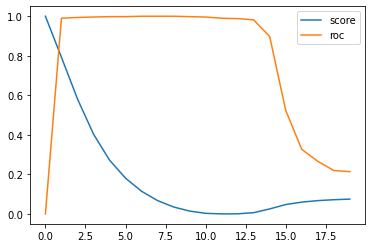

In [105]:
plt.plot(scaler.fit_transform(np.array(score_vec).reshape(-1,1)), label = "score")
plt.plot(scaler.fit_transform(np.array(acc_vec).reshape(-1,1)), label = "roc")
plt.legend()

Text(0.5, 0, 'log($\\lambda$)')

Text(0, 0.5, 'ERUB')

Text(0, 0.5, 'ROC')

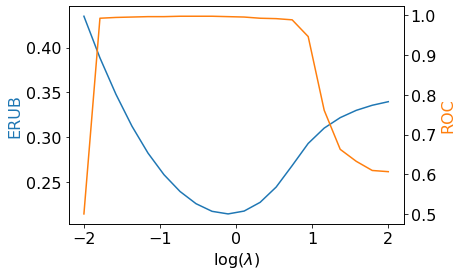

In [114]:

# # Sample data
x = np.log10([i for i in np.logspace(-2, 2, 20)])
y1 = score_vec
y2 = acc_vec

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot the first dataset on the first axis
ax1.plot(x, y1, color='#1f77b4')
# ax1.set_ylim(0,0.15)
ax1.set_xlabel(r'log($\lambda$)', fontsize =16)
ax1.set_ylabel('ERUB', color='#1f77b4', fontsize = 16)

# Create a second axis that shares the same x-axis as the first axis
ax2 = ax1.twinx()

# Plot the second dataset on the second axis
ax2.plot(x, y2, color='#ff7f0e')
ax2.set_ylabel('ROC', color='#ff7f0e', fontsize = 16)

# Set title and show the plot
# plt.title('DoubleY-axis Line Plot')

# threshold_density = 1.2
# density_levelset_idx = density_vec > threshold_density
# ax2.scatter(x[density_levelset_idx], np.repeat(threshold_density,density_levelset_idx.sum()), c = "r")

ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)


# threshold_distance = np.array([ (i / n)**(1 / d) for i in range(1, k + 1)]).mean() / (2 * threshold_density)**(1/d)
# distance_levelset_idx = distance_vec < threshold_distance
# ax1.scatter(x[distance_levelset_idx], np.repeat(threshold_distance,distance_levelset_idx.sum()), c = "b")

plt.savefig("./results/plot/ROC_ERUB.pdf",bbox_inches="tight")


In [7]:
from distribution import TestDistribution

In [8]:
distribution = TestDistribution(index = 4, dim = 1).returnDistribution()

In [9]:
n = 1000
X = distribution.sampling(n)
y = (distribution.density(X) < 0.6).astype(int)

In [10]:

score_vec = []
acc_vec = []
for lamda in [i for i in np.logspace(-3, 2, 20)]:
    model_NNDAD = NNDAD( lamda_list = [lamda]).fit(X)
    scaler = MinMaxScaler()
    y_pred = scaler.fit_transform(  model_NNDAD.predict(X).reshape(-1,1))
    roc_auc = roc_auc_score(y, y_pred)
    
    score_vec.append(model_NNDAD.best_score)
    acc_vec.append(roc_auc)


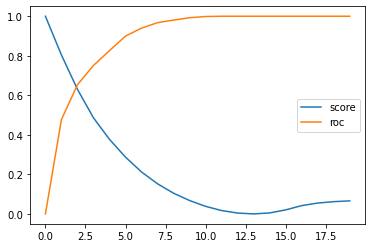

In [11]:
plt.plot(scaler.fit_transform(np.array(score_vec).reshape(-1,1)), label = "score")
plt.plot(scaler.fit_transform(np.array(acc_vec).reshape(-1,1)), label = "roc")
plt.legend()

## statistic - mae

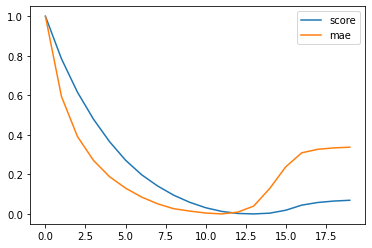

In [26]:
from distribution import TestDistribution

distribution = TestDistribution(index = 2, dim = 1).returnDistribution()

n = 1000
X = distribution.sampling(n)
X_test = distribution.sampling( 2 * n)


score_vec = []
mae_vec = []
for lamda in [i for i in np.logspace(-3, 2, 20)]:
    model_NNDAD = NNDAD( lamda_list = [lamda]).fit(X)
    
    
    score_vec.append(model_NNDAD.best_score)
    mae_vec.append(np.abs(model_NNDAD.density(X_test) -  distribution.density(X_test)).sum())

score_vec = np.array(score_vec)
score_vec = (score_vec - score_vec.min()) / (score_vec.max() - score_vec.min())
score_vec = (score_vec - score_vec.min()) / (score_vec.max() - score_vec.min())
mae_vec = np.array(mae_vec)
mae_vec = (mae_vec - mae_vec.min()) / (mae_vec.max() - mae_vec.min())
mae_vec = (mae_vec - mae_vec.min()) / (mae_vec.max() - mae_vec.min())
plt.plot(score_vec, label = "score")
plt.plot(mae_vec, label = "mae")
plt.legend()

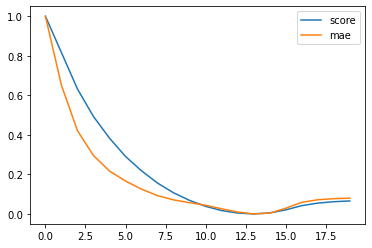

In [18]:
from distribution import TestDistribution

distribution = TestDistribution(index = 4, dim = 1).returnDistribution()

n = 1000
X = distribution.sampling(n)
X_test = distribution.sampling( 2 * n)


score_vec = []
mae_vec = []
for lamda in [i for i in np.logspace(-3, 2, 20)]:
    model_NNDAD = NNDAD( lamda_list = [lamda]).fit(X)
    
    
    score_vec.append(model_NNDAD.best_score)
    mae_vec.append(np.abs(model_NNDAD.density(X_test) -  distribution.density(X_test)).sum())

score_vec = np.array(score_vec)
score_vec = (score_vec - score_vec.min()) / (score_vec.max() - score_vec.min())
score_vec = (score_vec - score_vec.min()) / (score_vec.max() - score_vec.min())
mae_vec = np.array(mae_vec)
mae_vec = (mae_vec - mae_vec.min()) / (mae_vec.max() - mae_vec.min())
mae_vec = (mae_vec - mae_vec.min()) / (mae_vec.max() - mae_vec.min())
plt.plot(score_vec, label = "score")
plt.plot(mae_vec, label = "mae")
plt.legend()

## Realdata ROC - ERUB

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import matplotlib.ticker as mtick
import numpy as np
from time import time
import math
from matplotlib import patches
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import glob
from sklearn.preprocessing import MinMaxScaler
from NNDAD import NNDAD 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KDTree
from distribution import TestDistribution
from sklearn.metrics import f1_score
import mat73
from scipy.io import loadmat

In [6]:
data_file_path = "./dataset/anomaly_raw/wbc.mat"
data = loadmat(data_file_path)
X_train = data["X"]
y_train = data["y"].reshape(-1)
X_train = X_train[:, np.logical_not(np.isclose(X_train.min(axis=0), X_train.max(axis=0)))]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)


In [7]:

score_vec = []
acc_vec = []
for lamda in [i for i in np.logspace(-1, 2, 20)]:
    model_NNDAD, dist_list = NNDAD( lamda_list = [lamda]).fit(X_train)
    scaler = MinMaxScaler()
    y_pred = scaler.fit_transform(  model_NNDAD.predict(X_train).reshape(-1,1))
    roc_auc = roc_auc_score(y_train, y_pred)
    
    score_vec.append(model_NNDAD.best_score)
    acc_vec.append(roc_auc)


kd-tree time 0.0014557838439941406s
finished
finished
query time 0.12115931510925293s
optimization of weights time 0.0002701282501220703s
kd-tree time 0.0013685226440429688s
finished
finished
query time 0.1205291748046875s
optimization of weights time 0.0010156631469726562s
kd-tree time 0.0016465187072753906s
finished
finished
query time 0.11993241310119629s
optimization of weights time 0.0010497570037841797s
kd-tree time 0.001638650894165039s
finished
finished
query time 0.11567187309265137s
optimization of weights time 0.0010304450988769531s
kd-tree time 0.0016698837280273438s
finished
finished
query time 0.11861896514892578s
optimization of weights time 0.0011065006256103516s
kd-tree time 0.0008471012115478516s
finished
finished
query time 0.11860299110412598s
optimization of weights time 0.0010275840759277344s
kd-tree time 0.0007731914520263672s
finished
finished
query time 0.11818504333496094s
optimization of weights time 0.0010225772857666016s
kd-tree time 0.0013327598571777344s


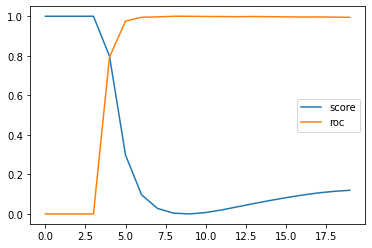

In [8]:
plt.plot(scaler.fit_transform(np.array(score_vec).reshape(-1,1)), label = "score")
plt.plot(scaler.fit_transform(np.array(acc_vec).reshape(-1,1)), label = "roc")
plt.legend()

In [5]:
dist_list

[array([0.        , 0.35083904, 0.38632104, 0.40622914, 0.41978544,
        0.43349288, 0.44403554, 0.45338181, 0.46213286, 0.4698355 ,
        0.4765443 , 0.4829339 , 0.48860427, 0.49356721, 0.4983064 ,
        0.50325102, 0.50786845, 0.51241121, 0.51684062, 0.52078354,
        0.52470298, 0.52892187, 0.5325221 , 0.53598566, 0.53951281,
        0.54308133, 0.54641669, 0.54961405, 0.55235769, 0.55530955,
        0.55825027, 0.56102113, 0.56380429, 0.5663576 , 0.56891017,
        0.57174118, 0.57451251, 0.57709699, 0.57957116, 0.5821816 ,
        0.58449961, 0.58696218, 0.58924945, 0.59132029, 0.59345938,
        0.59561808, 0.59790581, 0.60024312, 0.60240223, 0.60454314,
        0.60679138, 0.60876377, 0.61105436, 0.61320711, 0.61537363,
        0.6174249 , 0.61949293, 0.62149112, 0.62356426, 0.62533062,
        0.62706465, 0.62897348, 0.63092105, 0.63259331, 0.63440805,
        0.63598421, 0.6377496 , 0.63942746, 0.64129182, 0.64311957,
        0.64498274, 0.64670835, 0.64853307, 0.65

In [3]:
data_file_path = "./dataset/anomaly/glass.csv"
data = pd.read_csv(data_file_path)
data = np.array(data)
X_train=data[:,:-1]
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train=data[:,-1]

In [4]:

score_vec = []
acc_vec = []
for lamda in [i for i in np.logspace(-1, 2, 20)]:
    model_NNDAD,_ = NNDAD( lamda_list = [lamda]).fit(X_train)
    scaler = MinMaxScaler()
    y_pred = scaler.fit_transform(  model_NNDAD.predict(X_train).reshape(-1,1))
    roc_auc = roc_auc_score(y_train, y_pred)
    
    score_vec.append(model_NNDAD.best_score)
    acc_vec.append(roc_auc)


kd-tree time 0.0007243156433105469s
finished
finished
query time 0.11982488632202148s
optimization of weights time 1.038179636001587s
kd-tree time 0.00043320655822753906s
finished
finished
query time 0.11784219741821289s
optimization of weights time 0.0010178089141845703s
kd-tree time 0.0005152225494384766s
finished
finished
query time 0.12259888648986816s
optimization of weights time 0.0011749267578125s
kd-tree time 0.0005350112915039062s
finished
finished
query time 0.11829519271850586s
optimization of weights time 0.0010752677917480469s
kd-tree time 0.0005133152008056641s
finished
finished
query time 0.12053751945495605s
optimization of weights time 0.001027822494506836s
kd-tree time 0.0005407333374023438s
finished
finished
query time 0.12043046951293945s
optimization of weights time 0.0010449886322021484s
kd-tree time 0.0005240440368652344s
finished
finished
query time 0.12139201164245605s
optimization of weights time 0.0006387233734130859s
kd-tree time 0.0004093647003173828s
finis

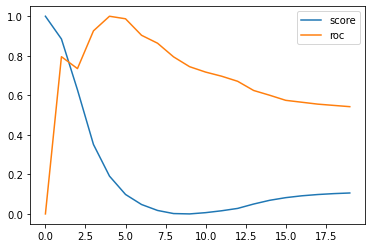

In [5]:
plt.plot(scaler.fit_transform(np.array(score_vec).reshape(-1,1)), label = "score")
plt.plot(scaler.fit_transform(np.array(acc_vec).reshape(-1,1)), label = "roc")
plt.legend()

## Robustness of ROC to rho

In [25]:
from distribution import TestDistribution

In [26]:
distribution = TestDistribution(index = 2, dim = 1).returnDistribution()

In [27]:
n = 2000
np.random.seed(666)
X = distribution.sampling(n)
model_NNDAD = NNDAD( lamda_list = [i for i in np.logspace(-3, 2, 20)]).fit(X)

y_pred = model_NNDAD.predict(X).reshape(-1,1)
density = distribution.density(X)

ratio_vec = [0.02 * i + 0.02 for i in range(50)]
roc_vec = []
for ratio in ratio_vec:
    
    rho = np.quantile( density, ratio)
    y = (distribution.density(X) < rho).astype(int)
    
    roc_auc = roc_auc_score(y, y_pred)
    roc_vec.append(roc_auc)

In [29]:
(model_NNDAD.weights > 0).sum()

327

In [30]:
model_NNDAD.lamda

2.636650898730358

In [35]:
tree_KNN = KDTree(X)
distance_vec,_=tree_KNN.query(X, 20 + 1)
distance_vec = distance_vec[:,-1]
y_pred_knn = distance_vec
density = distribution.density(X)

ratio_vec = [0.02 * i + 0.02 for i in range(50)]
roc_vec_knn = []
for ratio in ratio_vec:
    
    rho = np.quantile( density, ratio)
    y = (distribution.density(X) < rho).astype(int)
    
    roc_auc = roc_auc_score(y, y_pred_knn)
    roc_vec_knn.append(roc_auc)



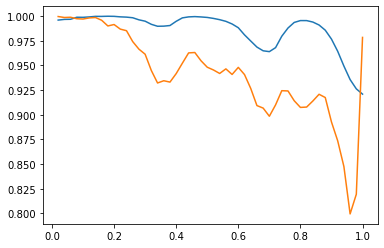

In [36]:
plt.plot(ratio_vec, roc_vec)
plt.plot(ratio_vec, roc_vec_knn)


(0.9, 1.0)

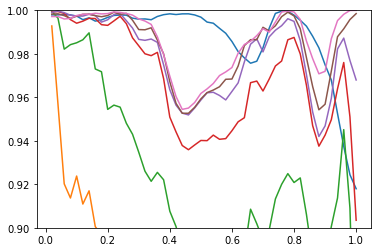

In [51]:
plt.plot(ratio_vec, roc_vec)
for k in [2,10,30,50,75,100]:  
    n = 2000
    np.random.seed(666)
    X = distribution.sampling(n)
    tree_KNN = KDTree(X)
    distance_vec,_=tree_KNN.query(X, k + 1)
    distance_vec = distance_vec[:,-1]
    y_pred_knn = distance_vec
    density = distribution.density(X)

    ratio_vec = [0.02 * i + 0.02 for i in range(50)]
    roc_vec_knn = []
    for ratio in ratio_vec:

        rho = np.quantile( density, ratio)
        y = (distribution.density(X) < rho).astype(int)

        roc_auc = roc_auc_score(y, y_pred_knn)
        roc_vec_knn.append(roc_auc)

    
    plt.plot(ratio_vec, roc_vec_knn)

plt.ylim(0.9,1)

(0.9, 1.0)

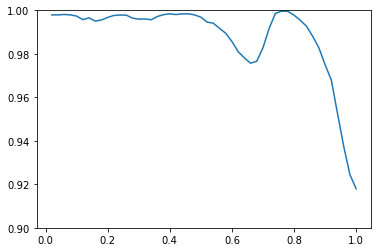

In [50]:
plt.plot(ratio_vec, roc_vec)
plt.ylim(0.9,1)

## Robustness of MAE to rho

In [5]:
distribution = TestDistribution(index = 2, dim = 1).returnDistribution()
n = 2000
np.random.seed(666)
X = distribution.sampling(n)
model_NNDAD = NNDAD( lamda_list = [i for i in np.logspace(-3, 2, 20)]).fit(X)

y_pred = model_NNDAD.predict(X).reshape(-1,1)
density = distribution.density(X)

mae = np.abs(density - y_pred).mean()

In [13]:
mae_vec = []
k_vec = np.array([2 + 5 * i for i in range(150)])
for k in k_vec:  
    n = 2000
    np.random.seed(666)
    X = distribution.sampling(n)
    tree_KNN = KDTree(X)
    distance_vec,_=tree_KNN.query(X, k + 1)
    distance_vec = distance_vec[:,-1]
    y_pred_knn = distance_vec
    density = distribution.density(X)

    mae_vec.append(np.abs(density - y_pred_knn).mean())

    



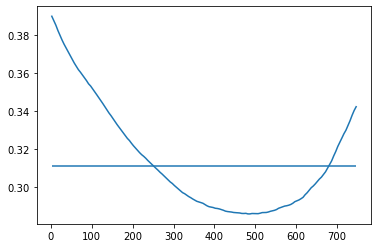

In [16]:
plt.plot(k_vec, mae_vec)
plt.hlines(mae,  k_vec.min(), k_vec.max())

Text(0.5, 1.0, 'n = 2000, k = 2')

<AxesSubplot:title={'center':'n = 2000, k = 2'}, ylabel='Density'>

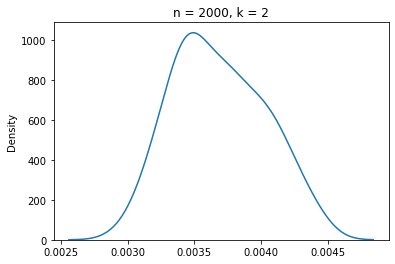

Text(0.5, 1.0, 'n = 2000, k = 50')

<AxesSubplot:title={'center':'n = 2000, k = 50'}, ylabel='Density'>

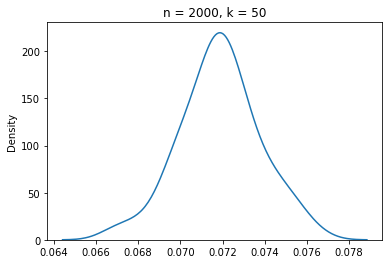

Text(0.5, 1.0, 'n = 2000, k = 100')

<AxesSubplot:title={'center':'n = 2000, k = 100'}, ylabel='Density'>

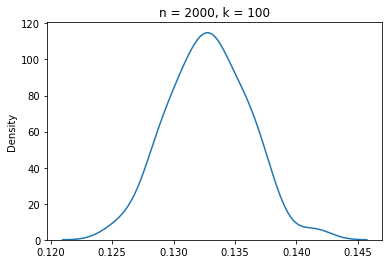

Text(0.5, 1.0, 'n = 2000, k = 200')

<AxesSubplot:title={'center':'n = 2000, k = 200'}, ylabel='Density'>

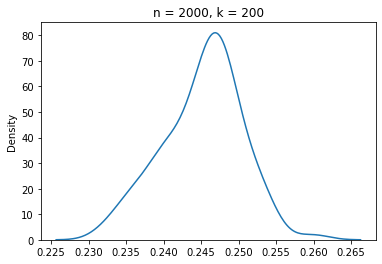

Text(0.5, 1.0, 'n = 2000, k = 800')

<AxesSubplot:title={'center':'n = 2000, k = 800'}, ylabel='Density'>

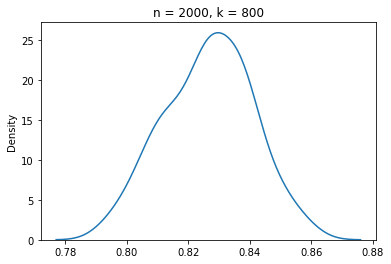

In [57]:
distribution = TestDistribution(index = 1, dim = 1).returnDistribution()
n = 2000
k_vec = [2,50,100,200,800]

np.random.seed(202)



for k in k_vec:
   
    y_vec = []
    for _ in range(100):
    

        X, density = distribution.generate(n)

        # kd tree and get threshold
        tree_KNN = KDTree(X)

        avg_dist = tree_KNN.query(X, k + 1)[0][:,-1].mean()
        
        
        y_vec.append(avg_dist)
    
    plt.title("n = {}, k = {}".format(n,k))
    sb.kdeplot(y_vec) 
    plt.show()

## Time Test

In [1]:
from distribution import TestDistribution
import numpy as np
from NNDAD import NNDAD

np.random.seed(1)  
distribution = TestDistribution(index = 4, dim = 1).returnDistribution()

n = 50000
X = distribution.sampling(n)

model_NNDAD = NNDAD( lamda_list = [i for i in np.logspace(-3,3,20)]).fit(X)

kd-tree time 0.010926485061645508s
query time 317.4496555328369s
optimization of weights time 1.207179307937622s


In [2]:
from distribution import TestDistribution
import numpy as np
from NNDAD import NNDAD

np.random.seed(1)  
distribution = TestDistribution(index = 4, dim = 1).returnDistribution()

n = 50000
X = distribution.sampling(n)

model_NNDAD = NNDAD(max_samples_ratio = 0.3, lamda_list = [i for i in np.logspace(-3,3,20)]).fit(X)

kd-tree time 0.010106325149536133s
query time 99.97283291816711s
optimization of weights time 0.004998922348022461s


In [3]:
from distribution import TestDistribution
import numpy as np
from NNDAD import NNDAD

np.random.seed(1)  
distribution = TestDistribution(index = 4, dim = 10).returnDistribution()

n = 600000
X = distribution.sampling(n)

model_NNDAD = NNDAD(max_samples_ratio = 0.01, lamda_list = [i for i in np.logspace(-3,3,20)]).fit(X)

kd-tree time 1.1567277908325195s
query time 11540.002923727036s
optimization of weights time 0.003087759017944336s


In [5]:
1

1

In [2]:
from distribution import TestDistribution
import numpy as np
from NNDAD import NNDAD

np.random.seed(1)  
distribution = TestDistribution(index = 4, dim = 10).returnDistribution()

n = 600000
X = distribution.sampling(n)

model_NNDAD = NNDAD(max_samples_ratio = 0.01, lamda_list = [i for i in np.logspace(-3,3,20)]).fit(X)

kd-tree time 1.1797800064086914s
query time 714.6960184574127s
optimization of weights time 1.1835942268371582s


In [2]:
from distribution import TestDistribution
import numpy as np
from NNDAD import NNDAD

np.random.seed(1)  
distribution = TestDistribution(index = 4, dim = 2).returnDistribution()

n = 600000
X = distribution.sampling(n)

model_NNDAD = NNDAD(max_samples_ratio = 0.002, lamda_list = [i for i in np.logspace(-3,3,20)], parallel_num = 30).fit(X)

kd-tree time 0.30489182472229004s
query time 9.991864204406738s
optimization of weights time 1.1566720008850098s


In [3]:
model_NNDAD

In [4]:
n = 200
np.random.seed(200)
X, density = distribution.generate(n)




y1 = model_NNDAD.density(X)
y2 = density


In [5]:
np.abs(y1-y2).mean()

0.04269437699733911

In [4]:
import numpy as np
np.random.rand(6000,6000) @ np.random.rand(6000)

array([1533.49157431, 1514.79418136, 1526.8055662 , ..., 1528.7765776 ,
       1515.93072384, 1503.78206794])

In [75]:


log_file_dir = "./results/simulation/NNDAD-B.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')

summary = pd.pivot_table(log, index=["dim", "n"],columns=["ratio"], values=[  "mae"], aggfunc=[np.min])

summary



amin                                 
                 mae                                 
ratio           0.01       0.05       0.10       0.50
dim n                                                
1   1000    0.129776   0.208934   0.158599   0.108653
    3000    0.120421   0.092544   0.091712   0.120033
    5000    0.076254   0.081597   0.087380   0.096180
    7500    0.089978   0.058774   0.064232   0.069389
    10000   0.065079   0.056117   0.076016   0.070486
5   1000   13.253615  13.557315  13.678819  12.819092
    3000   10.702075  10.168717  10.633370  10.618198
    5000    9.411745   9.339502   9.481321   9.198444
    7500    8.803900   8.911902   8.770648   8.828289

,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
425,0,1,10000,0.05,NaN,NaN,9.766593,9.709142,0.999726,0.118353,0.1
426,0,1,10000,0.05,NaN,NaN,9.835600,9.808384,0.999334,0.073472,0.3
427,0,1,10000,0.05,NaN,NaN,9.771457,9.725996,0.998879,0.060381,0.5
428,0,1,10000,0.05,NaN,NaN,9.784138,9.737005,0.998419,0.056448,0.7
429,0,1,10000,0.05,NaN,NaN,9.872295,9.809981,0.997930,0.056117,0.9
430,0,1,10000,0.05,NaN,NaN,9.810408,9.746576,0.997423,0.057213,1.1
431,0,1,10000,0.05,NaN,NaN,9.806259,9.788860,0.996935,0.059255,1.3
432,0,1,10000,0.05,NaN,NaN,9.782250,9.723216,0.996461,0.062762,1.5
433,0,1,10000,0.05,NaN,NaN,9.764902,9.728718,0.996012,0.067523,1.7
434,0,1,10000,0.05,NaN,NaN,9.810099,9.728208,0.995599,0.073203,1.9


In [78]:
log

,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
425,0,1,10000,0.05,NaN,NaN,9.766593,9.709142,0.999726,0.118353,0.1
426,0,1,10000,0.05,NaN,NaN,9.835600,9.808384,0.999334,0.073472,0.3
427,0,1,10000,0.05,NaN,NaN,9.771457,9.725996,0.998879,0.060381,0.5
428,0,1,10000,0.05,NaN,NaN,9.784138,9.737005,0.998419,0.056448,0.7
429,0,1,10000,0.05,NaN,NaN,9.872295,9.809981,0.997930,0.056117,0.9
430,0,1,10000,0.05,NaN,NaN,9.810408,9.746576,0.997423,0.057213,1.1
431,0,1,10000,0.05,NaN,NaN,9.806259,9.788860,0.996935,0.059255,1.3
432,0,1,10000,0.05,NaN,NaN,9.782250,9.723216,0.996461,0.062762,1.5
433,0,1,10000,0.05,NaN,NaN,9.764902,9.728718,0.996012,0.067523,1.7
434,0,1,10000,0.05,NaN,NaN,9.810099,9.728208,0.995599,0.073203,1.9


In [21]:


log_file_dir = "./results/simulation/NNDAD-S.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')


summary = pd.pivot_table(log, index=["dim", "n"],columns=["ratio"], values=[ "roc_auc", "mae"], aggfunc=[np.max])

summary



amax                                                      \
                    mae                                             roc_auc   
ratio              0.01          0.05          0.10          0.50      0.01   
dim n                                                                         
1   1000   3.283318e-01  2.952665e-01  2.742035e-01  2.876097e-01  0.997576   
    3000   1.971836e-01  1.994029e-01  1.949691e-01  1.855645e-01  0.994871   
    5000   1.600925e-01  1.842231e-01  1.678977e-01  1.434782e-01  0.992299   
    7500   1.505963e-01  1.288596e-01  1.282601e-01  1.252618e-01  0.992388   
    10000  1.117975e-01  1.148005e-01  1.207780e-01  1.342228e-01  0.994117   
5   1000   2.542193e+01  2.390900e+01  2.511414e+01  2.501636e+01  0.884848   
    3000   2.345169e+01  2.395577e+01  2.342341e+01  2.336485e+01  0.969753   
    5000   2.244464e+01  2.269451e+01  2.267353e+01  2.250958e+01  0.972453   
    7500   2.165993e+01  2.173499e+01  2.179633e+01  2.226345e+01  0.981687   
    10000  2.156400e+01  2.110851e+01  2.153132e+01  2.124597e+01  0.976762   
10  1000   8.092529e+02  6.625248e+02  6.949900e+02  6.854287e+02  0.744747   
    3000   6.946903e+02  7.113402e+02  7.224354e+02  6.918483e+02  0.845241   
    5000   6.938442e+02  7.003828e+02  6.966225e+02  6.973032e+02  0.861552   
    7500   6.930698e+02  6.974855e+02  6.881355e+02  7.051416e+02  0.847413   
    10000  7.157094e+02  7.006980e+02  7.034104e+02  6.844658e+02  0.860958   
50  1000   9.285845e+13  1.162361e+14  2.906637e+14  9.392229e+13  0.703333   
    3000   1.239819e+14  1.998099e+14  1.448820e+14  1.663910e+14  0.788013   
    5000   1.571335e+14  1.267416e+14  1.331323e+14  1.870645e+14  0.784533   
    7500   1.798466e+14  2.517867e+14  2.210886e+14  1.179998e+14  0.750105   
    10000  2.300047e+14  8.687169e+13  1.963656e+14  2.349712e+14  0.743295   

                                         
                                         
ratio          0.05      0.10      0.50  
dim n                                    
1   1000   0.990716  0.989556  0.998204  
    3000   0.993263  0.995090  0.999510  
    5000   0.996209  0.997634  0.998680  
    7500   0.994557  0.997210  0.999739  
    10000  0.996108  0.997597  0.999931  
5   1000   0.845558  0.795567  0.657204  
    3000   0.902206  0.839781  0.733546  
    5000   0.923649  0.892582  0.787936  
    7500   0.939721  0.912692  0.845060  
    10000  0.947292  0.927806  0.846761  
10  1000   0.762463  0.699767  0.641956  
    3000   0.730936  0.706577  0.617745  
    5000   0.721772  0.709976  0.616736  
    7500   0.786765  0.725182  0.617871  
    10000  0.753638  0.721326  0.629991  
50  1000   0.763747  0.706456  0.626196  
    3000   0.694678  0.665907  0.616760  
    5000   0.699095  0.679573  0.613694  
    7500   0.708815  0.657570  0.607299  
    10000  0.706495  0.660487  0.614929

In [36]:


log_file_dir = "./results/simulation/NNDAD-B.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')



for n_check in [1000, 3000, 5000, 7500,  10000,]:
    for d in [1, 5, 10, 50]:
        
        logtemp = log[log["n"] == n_check]
        logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["dim"] == d]

        logtemp = logtemp[logtemp["iter"] == 0]
        min_mae = np.min(logtemp["mae"])
        min_mae
        #         logtemp
#         min_idx = np.argmin(logtemp["mae"])

#         best_lamda = np.array(logtemp["lamda"])[min_idx]
#         print(n_check, d, best_lamda)

        
        

log_file_dir = "./results/simulation/NNDAD-S.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')


for n_check in [1000, 3000, 5000, 7500,  10000,]:
    for d in [1, 5, 10, 50]:
        logtemp = log[log["n"] == n_check]
        logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["iter"] == 1]
        logtemp


0.2089338337179468

13.557314875276562

615.2132716643466

83610850371438.72

0.0925441361547984

10.16871724781361

580.0891740454138

199809811851738.2

0.0815965159771995

9.339501741027018

631.2177829053928

95101891998435.88

0.0587736655530731

8.911902456576742

626.4761827047917

91893020498602.1

0.056116502318075

8.360513299840342

594.9766312125005

76119988673556.8

,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
81,1,1,1000,0.05,NaN,NaN,0.166452,0.127978,0.985032,2.265178e-01,2.7
101,1,5,1000,0.05,NaN,NaN,0.120970,0.123798,0.711937,2.315088e+01,2.7
121,1,10,1000,0.05,NaN,NaN,0.132815,0.118676,0.728884,6.355019e+02,2.7
141,1,50,1000,0.05,NaN,NaN,0.174906,0.151229,0.763747,1.162361e+14,2.7


,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
85,1,1,3000,0.05,NaN,NaN,1.194510,1.110677,0.992756,1.486968e-01,2.9
105,1,5,3000,0.05,NaN,NaN,1.056954,0.990924,0.902206,2.331712e+01,2.9
125,1,10,3000,0.05,NaN,NaN,1.055123,0.994006,0.721918,6.788181e+02,2.9
145,1,50,3000,0.05,NaN,NaN,1.680423,1.639304,0.683825,9.639296e+13,2.9


,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
89,1,1,5000,0.05,NaN,NaN,2.870653,2.788618,0.996209,1.842231e-01,2.9
109,1,5,5000,0.05,NaN,NaN,2.910196,2.855034,0.920308,2.269451e+01,2.9
129,1,10,5000,0.05,NaN,NaN,2.856122,2.815142,0.720643,6.751015e+02,2.9
149,1,50,5000,0.05,NaN,NaN,4.769360,4.770548,0.671379,9.359067e+13,2.9


,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
93,1,1,7500,0.05,NaN,NaN,5.847494,5.907330,0.991260,1.155223e-01,2.9
113,1,5,7500,0.05,NaN,NaN,6.952342,6.846574,0.939721,2.144429e+01,2.9
133,1,10,7500,0.05,NaN,NaN,6.747094,6.717752,0.740254,6.760475e+02,2.9
153,1,50,7500,0.05,NaN,NaN,11.765331,11.969713,0.661040,2.517867e+14,2.9


,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
97,1,1,10000,0.05,NaN,NaN,10.338037,10.243739,0.993940,9.346008e-02,3.1
117,1,5,10000,0.05,NaN,NaN,11.941298,12.116951,0.934373,2.084569e+01,3.1
137,1,10,10000,0.05,NaN,NaN,13.509947,14.218007,0.747215,6.723428e+02,3.1
157,1,50,10000,0.05,NaN,NaN,21.224684,26.740769,0.706495,8.632827e+13,3.1


In [30]:

log_file_dir = "./results/simulation/NNDAD-S.csv"

log = pd.read_csv(log_file_dir, header=None)
log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')


for n_check in [1000, 3000, 5000, 7500,  10000,]:
    logtemp = log[log["n"] == n_check]
    logtemp = logtemp[logtemp["ratio"] == 0.05]
    logtemp = logtemp[logtemp["iter"] == 1]
    logtemp

,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
81,1,1,1000,0.05,NaN,NaN,0.166452,0.127978,0.985032,2.265178e-01,2.7
101,1,5,1000,0.05,NaN,NaN,0.120970,0.123798,0.711937,2.315088e+01,2.7
121,1,10,1000,0.05,NaN,NaN,0.132815,0.118676,0.728884,6.355019e+02,2.7
141,1,50,1000,0.05,NaN,NaN,0.174906,0.151229,0.763747,1.162361e+14,2.7


,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
85,1,1,3000,0.05,NaN,NaN,1.194510,1.110677,0.992756,1.486968e-01,2.9
105,1,5,3000,0.05,NaN,NaN,1.056954,0.990924,0.902206,2.331712e+01,2.9
125,1,10,3000,0.05,NaN,NaN,1.055123,0.994006,0.721918,6.788181e+02,2.9
145,1,50,3000,0.05,NaN,NaN,1.680423,1.639304,0.683825,9.639296e+13,2.9


,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
89,1,1,5000,0.05,NaN,NaN,2.870653,2.788618,0.996209,1.842231e-01,2.9
109,1,5,5000,0.05,NaN,NaN,2.910196,2.855034,0.920308,2.269451e+01,2.9
129,1,10,5000,0.05,NaN,NaN,2.856122,2.815142,0.720643,6.751015e+02,2.9
149,1,50,5000,0.05,NaN,NaN,4.769360,4.770548,0.671379,9.359067e+13,2.9


,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
93,1,1,7500,0.05,NaN,NaN,5.847494,5.907330,0.991260,1.155223e-01,2.9
113,1,5,7500,0.05,NaN,NaN,6.952342,6.846574,0.939721,2.144429e+01,2.9
133,1,10,7500,0.05,NaN,NaN,6.747094,6.717752,0.740254,6.760475e+02,2.9
153,1,50,7500,0.05,NaN,NaN,11.765331,11.969713,0.661040,2.517867e+14,2.9


,iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda
97,1,1,10000,0.05,NaN,NaN,10.338037,10.243739,0.993940,9.346008e-02,3.1
117,1,5,10000,0.05,NaN,NaN,11.941298,12.116951,0.934373,2.084569e+01,3.1
137,1,10,10000,0.05,NaN,NaN,13.509947,14.218007,0.747215,6.723428e+02,3.1
157,1,50,10000,0.05,NaN,NaN,21.224684,26.740769,0.706495,8.632827e+13,3.1


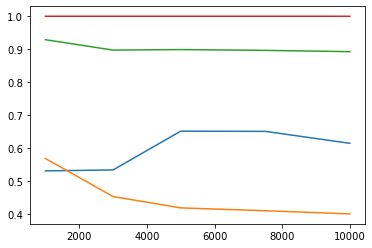

In [74]:






    


d = 1
for d in [1,5,10,50]:
    min_mae_vec = []
    selected_mae_vec = []
    ratio_vec = []
    for n_check in [1000, 3000, 5000, 7500,  10000,]:
    
        min_mae = 0
        selected_mae = 0 
        for iteration in [0,1,2,3,4,5]:

            log_file_dir = "./results/simulation/NNDAD-B.csv"
            log = pd.read_csv(log_file_dir, header=None)
            log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
            logtemp = log[log["n"] == n_check]
            logtemp = logtemp[logtemp["ratio"] == 0.05]
            logtemp = logtemp[logtemp["dim"] == d]
            logtemp = logtemp[logtemp["iter"] == iteration]
            min_mae += np.min(logtemp["mae"])
#             min_mae

            log_file_dir = "./results/simulation/NNDAD-S.csv"
            log = pd.read_csv(log_file_dir, header=None)
            log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
            logtemp = log[log["n"] == n_check]
            logtemp = logtemp[logtemp["ratio"] == 0.05]
            logtemp = logtemp[logtemp["iter"] == iteration]
            logtemp = logtemp[logtemp["dim"] == d]
            selected_mae += logtemp["mae"].min()
#             selected_mae

        min_mae_vec.append(min_mae)
        selected_mae_vec.append(selected_mae)
        ratio_vec.append(min_mae / selected_mae)
        
    plt.plot(n_check_vec, ratio_vec)
        

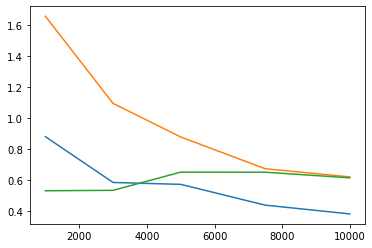

In [70]:
n_check_vec = [1000, 3000, 5000, 7500,  10000,]
plt.plot(n_check_vec, min_mae_vec)
plt.plot(n_check_vec, selected_mae_vec)




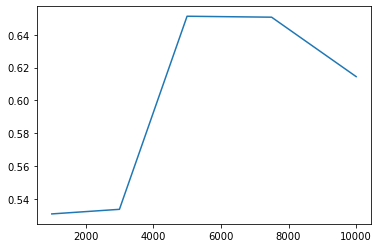

In [71]:
plt.plot(n_check_vec, ratio_vec)

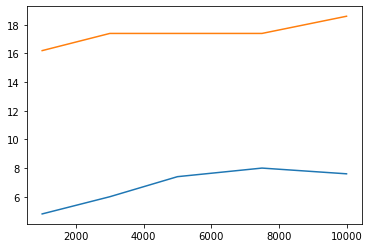

In [102]:
best_lamda_vec = []
selected_lamda_vec = []

d = 1
for n_check in [1000, 3000, 5000, 7500,  10000]:
    best_lamda = 0
    selected_lamda = 0 
    for iteration in [0,1,2,3,4,5]:

        log_file_dir = "./results/simulation/NNDAD-B.csv"
        log = pd.read_csv(log_file_dir, header=None)
        log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
        logtemp = log[log["n"] == n_check]
        logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["dim"] == d]
        logtemp = logtemp[logtemp["iter"] == iteration]
        min_mae_idx = np.argmin(logtemp["mae"])
        best_lamda += np.array(logtemp["lamda"])[min_mae_idx]

        log_file_dir = "./results/simulation/NNDAD-S.csv"
        log = pd.read_csv(log_file_dir, header=None)
        log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
        logtemp = log[log["n"] == n_check]
        logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["iter"] == iteration]
        logtemp = logtemp[logtemp["dim"] == d]
        selected_lamda += logtemp["lamda"].mean()
        
        
    best_lamda_vec.append(best_lamda)
    selected_lamda_vec.append(selected_lamda)

    
    
n_check_vec = [1000, 3000, 5000, 7500,  10000]
plt.plot(n_check_vec, best_lamda_vec)
plt.plot(n_check_vec, selected_lamda_vec)


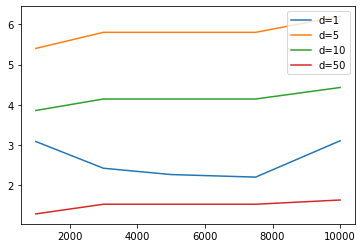

In [116]:


for d in [1, 5, 10, 50]:
    best_lamda_vec = []
    selected_lamda_vec = []
    ratio_vec = []
    for n_check in [1000, 3000, 5000, 7500,  10000]:
        best_lamda = 0
        selected_lamda = 0 
        ratio = 0
        for iteration in [0,1,2,3,4,5]:

            log_file_dir = "./results/simulation/NNDAD-B.csv"
            log = pd.read_csv(log_file_dir, header=None)
            log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
            logtemp = log[log["n"] == n_check]
            logtemp = logtemp[logtemp["ratio"] == 0.05]
            logtemp = logtemp[logtemp["dim"] == d]
            logtemp = logtemp[logtemp["iter"] == iteration]
            min_mae_idx = np.argmin(logtemp["mae"])
            best_lamda += np.array(logtemp["lamda"])[min_mae_idx]

            log_file_dir = "./results/simulation/NNDAD-S.csv"
            log = pd.read_csv(log_file_dir, header=None)
            log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
            logtemp = log[log["n"] == n_check]
            logtemp = logtemp[logtemp["ratio"] == 0.05]
            logtemp = logtemp[logtemp["iter"] == iteration]
            logtemp = logtemp[logtemp["dim"] == d]
            selected_lamda += logtemp["lamda"].mean()

            ratio += selected_lamda / best_lamda


        best_lamda_vec.append(best_lamda)
        selected_lamda_vec.append(selected_lamda)
        ratio_vec.append(ratio / 6)


    n_check_vec = [1000, 3000, 5000, 7500,  10000]

    plt.plot(n_check_vec, ratio_vec, label = "d={}".format(d))

plt.legend()
plt.savefig("./results/plot/ratio_lamda.pdf",bbox_inches="tight")

In [130]:






    
min_mae_vec = []
selected_mae_vec = []

d = 5

for n_check in [1000 * i for i in range(1, 11)]:
    min_mae = 0
    selected_mae = 0 
    for iteration in [0]:
        
        log_file_dir = "./results/simulation/NNDAD-B-ld.csv"
        log = pd.read_csv(log_file_dir, header=None)
        log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
        logtemp = log[log["n"] == n_check]
        logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["dim"] == d]
        logtemp = logtemp[logtemp["iter"] == iteration]
        min_mae += np.min(logtemp["mae"])
        min_mae
        
        log_file_dir = "./results/simulation/NNDAD-S-ld.csv"
        log = pd.read_csv(log_file_dir, header=None)
        log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
        logtemp = log[log["n"] == n_check]
        logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["iter"] == iteration]
        logtemp = logtemp[logtemp["dim"] == d]
        selected_mae += logtemp["mae"].min()
        selected_mae
        
    min_mae_vec.append(min_mae)
    selected_mae_vec.append(selected_mae)


13.171319789065231

22.773444969090004

11.904664189366825

23.32576694597932

10.342843947165834

22.230796796996223

9.871588377302698

22.44431529934267

9.462495426806765

22.619873542501537

9.24435437190674

22.077914645362814

8.82852156697739

21.73880176681463

8.674354427504456

21.25603317441101

8.58955490163376

21.39679422779909

8.327672881697644

20.75710476755981

(0.0, 25.658343640577254)

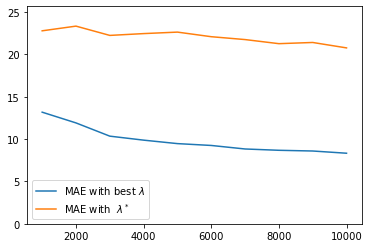

In [132]:
n_check_vec = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000,  10000,]
plt.plot(n_check_vec, min_mae_vec, label = r"MAE with best $\lambda$")
plt.plot(n_check_vec, selected_mae_vec, label = r"MAE with  $\lambda^*$")
plt.ylim(0, 1.1* np.max(selected_mae_vec))

plt.legend()

plt.savefig("./results/plot/mae_dim_{}.pdf".format(d), bbox_inches="tight")

In [104]:






    
best_lamda_vec = []
selected_lamda_vec = []

d = 1

for n_check in [1000 * i for i in range(1, 11)]:
    best_lamda = 0
    selected_lamda = 0 
    for iteration in [0]:
        
        log_file_dir = "./results/simulation/NNDAD-B-ld.csv"
        log = pd.read_csv(log_file_dir, header=None)
        log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
        logtemp = log[log["n"] == n_check]
        logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["dim"] == d]
        logtemp = logtemp[logtemp["iter"] == iteration]
        min_mae_idx = np.argmin(logtemp["mae"])
        best_lamda += np.array(logtemp["lamda"])[min_mae_idx]
        
        log_file_dir = "./results/simulation/NNDAD-S-ld.csv"
        log = pd.read_csv(log_file_dir, header=None)
        log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
        logtemp = log[log["n"] == n_check]
        logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["iter"] == iteration]
        logtemp = logtemp[logtemp["dim"] == d]
        selected_lamda += logtemp["lamda"].mean()
        
        
    best_lamda_vec.append(best_lamda)
    selected_lamda_vec.append(selected_lamda)


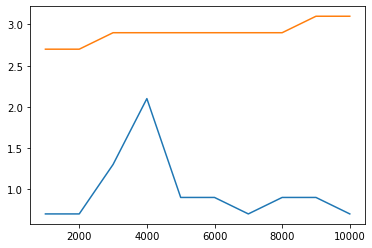

In [105]:
n_check_vec = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000,  10000,]
plt.plot(n_check_vec, best_lamda_vec)
plt.plot(n_check_vec, selected_lamda_vec)


[12.778881987577641, 5.337541528239203, 8.219696969696969, 7.7861305361305355, 8.409693754521339, 7.195258230141951]


[13.1218487394958, 12.42857142857143, 13.285714285714285, 12.347049689440993, 12.90062111801242, 12.347049689440993]


[16.200000000000003, 17.400000000000002, 18.6, 18.6, 18.6, 18.6]


[11.571428571428573, 17.400000000000002, 18.6, 18.6, 18.6, 18.6]


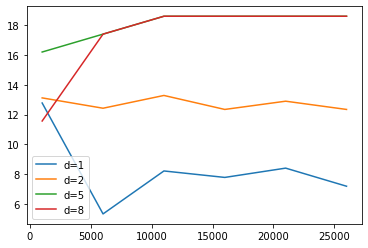

In [23]:


for d in [1, 2, 5, 8]:
    best_lamda_vec = []
    selected_lamda_vec = []
    ratio_vec = []
    for n_check in [1000 + 5000 * i for i in range(6)]:
        best_lamda = 0
        selected_lamda = 0 
        ratio = 0
        for iteration in [0,1,2]:

            log_file_dir = "./results/simulation/NNDAD-B-ld-f.csv"
            log = pd.read_csv(log_file_dir, header=None)
            log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
#             print(log)
            logtemp = log[log["n"] == n_check]
#             logtemp = logtemp[logtemp["ratio"] == 0.01]
            logtemp = logtemp[logtemp["dim"] == d]
            logtemp = logtemp[logtemp["iter"] == iteration]
            min_mae_idx = np.argmin(logtemp["mae"])
            best_lamda += np.array(logtemp["lamda"])[min_mae_idx]

            log_file_dir = "./results/simulation/NNDAD-S-ld-f.csv"
            log = pd.read_csv(log_file_dir, header=None)
            log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
            logtemp = log[log["n"] == n_check]
#             logtemp = logtemp[logtemp["ratio"] == 0.01]
            logtemp = logtemp[logtemp["iter"] == iteration]
            logtemp = logtemp[logtemp["dim"] == d]
            selected_lamda += logtemp["lamda"].mean()

            ratio += selected_lamda / best_lamda


        best_lamda_vec.append(best_lamda)
        selected_lamda_vec.append(selected_lamda)
        ratio_vec.append(ratio )


    n_check_vec = [1000 + 5000 * i for i in range(6)]

    plt.plot(n_check_vec, ratio_vec, label = "d={}".format(d))
    print(ratio_vec)

plt.legend()
plt.savefig("./results/plot/ratio_lamda.pdf",bbox_inches="tight")

0.5153748070129961

1.4858879244750247

0.9880816508392246

2.9527635814818707

1.4461985678060048

4.441279561888152

0.2873409801919296

0.8171744738536367

0.5869683631103675

1.6338428089973558

0.8721083223530818

2.439419449765835

0.2383532853419521

0.6826410718002356

0.4921026600619935

1.3741569000145974

0.7228884266853772

2.08052401370976

0.228125609419364

0.6017448444158754

0.4486389284898771

1.1953122980042266

0.6774274583762551

1.7780144280645214

0.204040873281281

0.5444261677616803

0.4034392515839327

1.088056265777737

0.6103729026852697

1.6091819519724395

0.200325554394799

0.5074444780323097

0.3865153163846634

1.0066983155652758

0.5920742315099699

1.5107504535453091

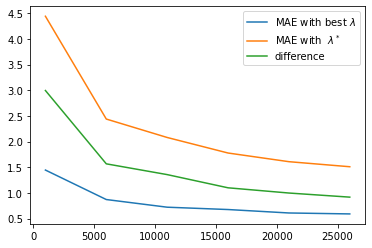

In [27]:






    
min_mae_vec = []
selected_mae_vec = []

d = 2

for n_check in [1000 + 5000 * i for i in range(6)]:
    min_mae = 0
    selected_mae = 0 
    for iteration in [0,1,2]:
        
        log_file_dir = "./results/simulation/NNDAD-B-ld-f.csv"
        log = pd.read_csv(log_file_dir, header=None)
        log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
        logtemp = log[log["n"] == n_check]
#         logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["dim"] == d]
        logtemp = logtemp[logtemp["iter"] == iteration]
        min_mae += np.min(logtemp["mae"])
        min_mae
        
        log_file_dir = "./results/simulation/NNDAD-S-ld-f.csv"
        log = pd.read_csv(log_file_dir, header=None)
        log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
        logtemp = log[log["n"] == n_check]
#         logtemp = logtemp[logtemp["ratio"] == 0.05]
        logtemp = logtemp[logtemp["iter"] == iteration]
        logtemp = logtemp[logtemp["dim"] == d]
        selected_mae += logtemp["mae"].mean()
        selected_mae
        
    min_mae_vec.append(min_mae)
    selected_mae_vec.append(selected_mae)


    
    
    
n_check_vec = [1000 + 5000 * i for i in range(6)]
plt.plot(n_check_vec, min_mae_vec, label = r"MAE with best $\lambda$")
plt.plot(n_check_vec, selected_mae_vec, label = r"MAE with  $\lambda^*$")
plt.plot(n_check_vec, np.array(selected_mae_vec) - np.array(min_mae_vec), label = "difference")

# plt.ylim(0, 1.1* np.max(selected_mae_vec))

plt.legend()

plt.savefig("./results/plot/mae_dim_{}.pdf".format(d), bbox_inches="tight")

[2.220032881264559, 1.9356187763062132, 2.0071463360386357, 1.737107757883687, 1.7274674084363437, 1.686056238461573]


[2.8831209912780147, 2.843919002809152, 2.86398851528683, 2.637778572723442, 2.6682211216140033, 2.5330990824677553]


[1.8365770825383327, 2.4674871755968852, 2.5648679108100727, 2.627283473830279, 2.698869895848493, 2.8098568381592015]


[1.298480854761501, 1.4663365730952416, 1.6097668966476857, 1.6872718087111336, 1.7425902971881626, 1.7281432306402522]


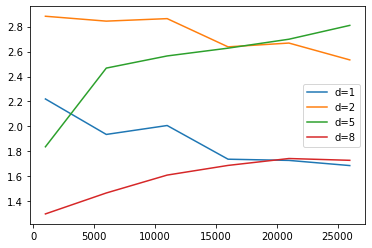

In [17]:


for d in [1, 2, 5, 8]:
    best_lamda_vec = []
    selected_lamda_vec = []
    ratio_vec = []
    for n_check in [1000 + 5000 * i for i in range(6)]:
        best_mae = 0
        selected_mae = 0 
        ratio = 0
        for iteration in [0,]:

            log_file_dir = "./results/simulation/NNDAD-B-ld-f.csv"
            log = pd.read_csv(log_file_dir, header=None)
            log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
#             print(log)
            logtemp = log[log["n"] == n_check]
#             logtemp = logtemp[logtemp["ratio"] == 0.01]
            logtemp = logtemp[logtemp["dim"] == d]
            logtemp = logtemp[logtemp["iter"] == iteration]
            min_mae_idx = np.argmin(logtemp["mae"])
            best_mae += np.array(logtemp["mae"])[min_mae_idx]

            log_file_dir = "./results/simulation/NNDAD-S-ld-f.csv"
            log = pd.read_csv(log_file_dir, header=None)
            log.columns = "iter,dim,n,ratio,n_estimators,max_samples,trainingtime,testtime,roc_auc,mae,lamda".split(',')
            logtemp = log[log["n"] == n_check]
#             logtemp = logtemp[logtemp["ratio"] == 0.01]
            logtemp = logtemp[logtemp["iter"] == iteration]
            logtemp = logtemp[logtemp["dim"] == d]
            selected_mae += logtemp["mae"].mean()

            ratio += selected_mae / best_mae


        best_lamda_vec.append(best_lamda)
        selected_lamda_vec.append(selected_lamda)
        ratio_vec.append(ratio )


    n_check_vec = [1000 + 5000 * i for i in range(6)]

    plt.plot(n_check_vec, ratio_vec, label = "d={}".format(d))
    print(ratio_vec)

plt.legend()
plt.savefig("./results/plot/ratio_mae.pdf",bbox_inches="tight")

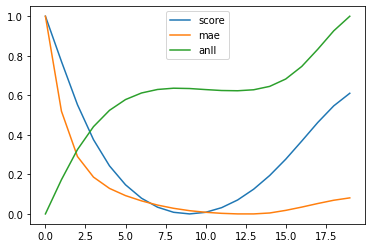

In [35]:
from distribution import TestDistribution
np.random.seed(1)  
distribution = TestDistribution(index = 1, dim = 2).returnDistribution()

n = 1000
X = distribution.sampling(n)
X_test = distribution.sampling(  n)


score_vec = []
mae_vec = []
anll_vec = []
lamda_vec = [i for i in np.logspace(-1, 2, 20)]
for lamda in lamda_vec:
    model_NNDAD = NNDAD( lamda_list = [lamda]).fit(X)

    score_vec.append(model_NNDAD.best_score)
    mae_vec.append(np.abs(model_NNDAD.density(X_test) -  distribution.density(X_test)).mean())
    anll_vec.append(-np.log(model_NNDAD.density(X_test)).mean())

    
scalar = MinMaxScaler()
score_vec = scalar.fit_transform(np.array(score_vec).reshape(-1,1))
mae_vec = scalar.fit_transform(np.array(mae_vec).reshape(-1,1))
anll_vec = scalar.fit_transform(np.array(anll_vec).reshape(-1,1))


plt.plot(score_vec,label = "score")
plt.plot(mae_vec,label = "mae")
plt.plot(anll_vec,label = "anll")
plt.legend()


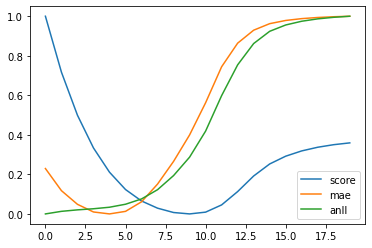

In [36]:
from distribution import TestDistribution
np.random.seed(1)  
distribution = TestDistribution(index = 5, dim = 2).returnDistribution()

n = 1000
X = distribution.sampling(n)
X_test = distribution.sampling(  n)


score_vec = []
mae_vec = []
anll_vec = []
lamda_vec = [i for i in np.logspace(-1, 2, 20)]
for lamda in lamda_vec:
    model_NNDAD = NNDAD( lamda_list = [lamda]).fit(X)

    score_vec.append(model_NNDAD.best_score)
    mae_vec.append(np.abs(model_NNDAD.density(X_test) -  distribution.density(X_test)).mean())
    anll_vec.append(-np.log(model_NNDAD.density(X_test)).mean())

    
scalar = MinMaxScaler()
score_vec = scalar.fit_transform(np.array(score_vec).reshape(-1,1))
mae_vec = scalar.fit_transform(np.array(mae_vec).reshape(-1,1))
anll_vec = scalar.fit_transform(np.array(anll_vec).reshape(-1,1))


plt.plot(score_vec,label = "score")
plt.plot(mae_vec,label = "mae")
plt.plot(anll_vec,label = "anll")
plt.legend()


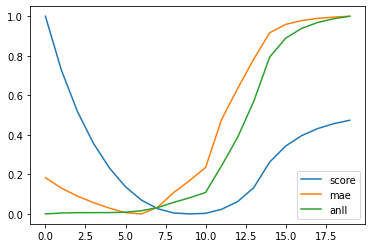

In [37]:
from distribution import TestDistribution
np.random.seed(1)  
distribution = TestDistribution(index = 2, dim = 2).returnDistribution()

n = 1000
X = distribution.sampling(n)
X_test = distribution.sampling(  n)


score_vec = []
mae_vec = []
anll_vec = []
lamda_vec = [i for i in np.logspace(-1, 2, 20)]
for lamda in lamda_vec:
    model_NNDAD = NNDAD( lamda_list = [lamda]).fit(X)

    score_vec.append(model_NNDAD.best_score)
    mae_vec.append(np.abs(model_NNDAD.density(X_test) -  distribution.density(X_test)).mean())
    anll_vec.append(-np.log(model_NNDAD.density(X_test)).mean())

    
scalar = MinMaxScaler()
score_vec = scalar.fit_transform(np.array(score_vec).reshape(-1,1))
mae_vec = scalar.fit_transform(np.array(mae_vec).reshape(-1,1))
anll_vec = scalar.fit_transform(np.array(anll_vec).reshape(-1,1))


plt.plot(score_vec,label = "score")
plt.plot(mae_vec,label = "mae")
plt.plot(anll_vec,label = "anll")
plt.legend()
